# Morgan Murphy - Titanic Project Submission

## Step 1: Reading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic = pd.read_csv('./train.csv')

#### Exploring the data a bit with .head(), .shape, .colums, .info()

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.shape

(891, 12)

In [5]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Step 2: Cleaning the data

#### Step 2.1: Create a bar chart showing how many missing values are in each column. 
To start, I used .isnull().sum() to see which variables had null values and how many null values there were. Then, I used .plot(kind="bar") to create the chart, with a title and x-y labels.

#### Answer 2.2: Cabin has the most null values with 687.

In [7]:
nulls = titanic.isnull().sum()

In [8]:
#This shows nulls in each column.
nulls

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0,0.5,'Number of Null Values')

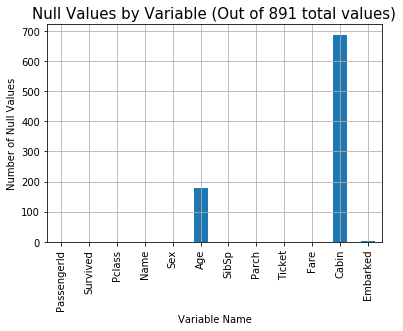

In [9]:
nulls.plot(kind="bar", grid=True)
plt.title('Null Values by Variable (Out of 891 total values)', fontsize=15)
plt.xlabel('Variable Name', fontsize=10)
plt.ylabel("Number of Null Values")

#### Step 2.3: Dropping rows where Embarked is NaN. 
I used .isnull() see where the null values in "Embarked" were and assigned that to "no_embarked". 
Then, I used .loc to see which rows had null Embarked values.
Then, I used .dropna to delete the subset of those two rows.

In [10]:
#Looking to see which Embarked rows are null
no_embarked = titanic['Embarked'].isnull()
titanic.loc[no_embarked]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
# I don't want to drop all rows with nulls, just the ones with Null values for Embarked, so I used subset
titanic.dropna(subset = ['Embarked'], inplace=True)

In [12]:
#Now the total number of rows is 889 and Embarked also has 889 values
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            712 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [13]:
#Can also see that the index 61 (which was null) is missing. 
titanic[59:63]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S


#### Step 2.4: Replacing Null values in the Cabin column
I used .fillna to replace the null values with ¯\(ツ)/¯'.

In [14]:
#before replacement
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
titanic.Cabin = titanic.Cabin.fillna('¯\(ツ)/¯')
#titanic['Cabin'].value_counts()

In [16]:
#after replacement
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S


## Step 3: Feature Extraction

#### Step 3.1: Created new FamilyCount column
The data dictionary on Kaggle.com indicated that the SibSp and Parch columns related to the number of family members on board. I simply created a new column, FamilyCount and assigned it to the sum of columns SibSp and Parch.

In [17]:
titanic['FamilyCount'] = titanic['SibSp'] + titanic['Parch']
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,¯\(ツ)/¯,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,¯\(ツ)/¯,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,¯\(ツ)/¯,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,¯\(ツ)/¯,C,1


#### Step 3.2. Identify which passengers were Reverends
In the Name column, those with "Rev." in the name are Reverends. I used .str.contains to isolate those rows with 'Rev.' in Name. There were 6 passengers who were Reverends. 

In [18]:
titanic[titanic['Name'].str.contains('Rev')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,¯\(ツ)/¯,S,0
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,¯\(ツ)/¯,S,0
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,¯\(ツ)/¯,S,1
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,¯\(ツ)/¯,Q,0
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,¯\(ツ)/¯,S,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,¯\(ツ)/¯,S,0


In [19]:
titanic['isReverend'] = titanic['Name'].str.contains("Rev.").astype(int)
titanic['isReverend'].value_counts()

0    883
1      6
Name: isReverend, dtype: int64

#### Step 3.3: Create dummy variables for Embarked and Sex
I started by creating duplicate variables for each, since I couldn't remember how to keep the original variable. Will try to find that code if I have time, but for now, this workaround lets me keep the original variable so that I can do .groupby later.

In [20]:
titanic['Embarked2'] = titanic['Embarked']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,isReverend,Embarked2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,S


In [21]:
titanic = pd.get_dummies(titanic, columns = ["Embarked2"])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,isReverend,Embarked2_C,Embarked2_Q,Embarked2_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1


In [22]:
titanic['Sex2'] = titanic['Sex']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,isReverend,Embarked2_C,Embarked2_Q,Embarked2_S,Sex2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1,male


In [23]:
titanic = pd.get_dummies(titanic, columns = ['Sex2'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,isReverend,Embarked2_C,Embarked2_Q,Embarked2_S,Sex2_female,Sex2_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1,0,1


## Step 4: Exporatory Analysis

#### Step 4.1: Since the variable Survived is 1 for lived and 0 for died, using .mean() shows the percentage of Survived to be about 38%.

In [24]:
#Overall survival rate was approximately 38%
titanic[['Survived']].mean() * 100

Survived    38.245219
dtype: float64

#### Step 4.2. Which gender fared worst? 
Using .groupby on the Sex column, men fared the worst with approximately 19% survival rate vs. 74% for women. 

In [25]:
titanic.groupby(['Sex'])['Survived'].mean() * 100

Sex
female    74.038462
male      18.890815
Name: Survived, dtype: float64

#### Step 4.3. Survival rate for Pclass
Again, used .groupby on the Pclass variable to see that the first class had the highest survival rate at 63%.

In [26]:
titanic.groupby(['Pclass'])['Survived'].mean() * 100

Pclass
1    62.616822
2    47.282609
3    24.236253
Name: Survived, dtype: float64

#### Step 4.4. Survival of Reverends
Tried something different with pd.crosstab to see that none of the 6 Reverends survived. 

In [27]:
#Answer to 4.4 - 0 Reverends survived.
pd.crosstab(index=titanic["Survived"], columns=titanic["isReverend"])

isReverend,0,1
Survived,,
0,543,6
1,340,0


#### Step 4.5. Survival rate for cabins marked ¯\(ツ)/¯
I created a duplicate variable for Cabin and attempted to create a function to isolate the 0 index of each Cabin value and then use .apply, but could not get it to work (code at the end of the notebook, commented out). Then upon researching The Google, I found code that used a for loop to capture the zero index of a column's value - using a series, not a dataframe.  #http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-19_17.html

The survival rate for cabins with a null value is approximately 30%.

In [28]:
titanic['CabinType'] = titanic['Cabin']

In [29]:
cabin2 = titanic["Cabin"].astype(object)
cabin2.dtype

dtype('O')

In [30]:
#ran a for loop on CabinType as an array
#checked the first 10 cases to see that it worked, and null values show up as "-".
CabinType = np.array([cabin[0] for cabin in cabin2])
CabinType[0:11]

array(['¯', 'C', '¯', 'C', '¯', '¯', 'E', '¯', '¯', '¯', 'G'], dtype='<U1')

In [31]:
# pd.Categorical saves CabinType back to the titanic dataframe
titanic["CabinType"] = pd.Categorical(CabinType)
titanic['CabinType'].value_counts()

¯    687
C     59
B     45
D     33
E     32
A     15
F     13
G      4
T      1
Name: CabinType, dtype: int64

In [32]:
#30% survival rate for passengers whose cabin was not captured on the manifest. 
titanic.groupby(['CabinType'])['Survived'].mean() * 100

CabinType
A    46.666667
B    73.333333
C    59.322034
D    75.757576
E    75.000000
F    61.538462
G    50.000000
T     0.000000
¯    29.985444
Name: Survived, dtype: float64

In [33]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,isReverend,Embarked2_C,Embarked2_Q,Embarked2_S,Sex2_female,Sex2_male,CabinType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1,0,1,¯
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1,1,0,¯
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,1,0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1,0,1,¯


In [34]:
#One person has cabin listed as T. I've not seen Cabin T listed in any other resources. 
#Not sure if I should drop this case? 
titanic[titanic['CabinType'].str.contains('T')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,isReverend,Embarked2_C,Embarked2_Q,Embarked2_S,Sex2_female,Sex2_male,CabinType
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,0,0,0,0,1,0,1,T


#### Step 4.6. Survival rate for people whose Age is empty?
Similar to how I handled dealing with "Embarked" nulls above, I used .isnull and .loc to isolate cases where age was Null. Then, another .groupby to see the survival rate of passengers whose age was not recorded was approximately 29%. 

In [35]:
no_age = titanic['Age'].isnull()
titanic.loc[no_age]
titanic.groupby(no_age)['Survived'].mean() * 100

Age
False    40.449438
True     29.378531
Name: Survived, dtype: float64

#### Step 4.7. Survival rate for each port of embarkation.
Another .groupby with mean

In [36]:
titanic.groupby(['Embarked'])['Survived'].mean() * 100

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

#### Step 4.8 Survival rate for children (under 12) in each Pclass.
For this one, I tried to create a function and use .apply to create a variable with age groups. Could not get the code to work (included in commented out below). 
I created bins of various age groups, the first being 12 and under, and assigned those age groups to a variable "age_bins". 
I then used pd.crosstabs to see survival rates for each age group within the Pclass. 
I divided the crosstabs by the totals ("All") to get the percentages.

For children under 12: 

Class 1: 75% survived
Class 2: 100% survived
Class 3: 43% survived

In [37]:
#https://stackoverflow.com/questions/45273731/binning-column-with-python-pandas
bins = [0, 13, 26, 41, 56, 100]
labels = ['0-12 yrs','13-25 yrs', '26-40 yrs','41-55 yrs','56+ yrs']
titanic['age_bins'] = pd.cut(titanic['Age'], bins=bins, labels=labels)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,FamilyCount,isReverend,Embarked2_C,Embarked2_Q,Embarked2_S,Sex2_female,Sex2_male,CabinType,age_bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,1,0,0,0,1,0,1,¯,13-25 yrs
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,0,1,0,0,1,0,C,26-40 yrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,0,0,0,1,1,0,¯,13-25 yrs
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,1,0,0,0,1,1,0,C,26-40 yrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,0,0,0,1,0,1,¯,26-40 yrs


In [38]:
#checking value counts to see how many children are under age 12
titanic['age_bins'].value_counts()

26-40 yrs    252
13-25 yrs    248
41-55 yrs    107
0-12 yrs      71
56+ yrs       34
Name: age_bins, dtype: int64

In [39]:
#used crosstabs to see the number of children under age 12 across Pclass = 71, matching the value count above.
age_survived = pd.crosstab(index=titanic["Survived"], columns=[titanic["Pclass"],titanic["age_bins"]],margins=True)
age_survived

Pclass          1                                              2            \
age_bins 0-12 yrs 13-25 yrs 26-40 yrs 41-55 yrs 56+ yrs 0-12 yrs 13-25 yrs   
Survived                                                                     
0               1         8        18        23      14        0        29   
1               3        32        48        30       7       18        20   
All             4        40        66        53      21       18        49   

Pclass                                      3                                \
age_bins 26-40 yrs 41-55 yrs 56+ yrs 0-12 yrs 13-25 yrs 26-40 yrs 41-55 yrs   
Survived                                                                      
0               40        15       6       28       123        88        26   
1               33        11       1       21        36        25         2   
All             73        26       7       49       159       113        28   

Pclass            All  
age_bins 56+ yrs       
Survived               
0              5  424  
1              1  288  
All            6  712

In [40]:
#converted crosstab to percentages
age_survived = pd.crosstab(index=titanic["Survived"], columns=[titanic["Pclass"],titanic["age_bins"]],margins=True)
(age_survived/age_survived.loc["All"]) * 100

Pclass          1                                                      2  \
age_bins 0-12 yrs 13-25 yrs   26-40 yrs   41-55 yrs     56+ yrs 0-12 yrs   
Survived                                                                   
0            25.0      20.0   27.272727   43.396226   66.666667      0.0   
1            75.0      80.0   72.727273   56.603774   33.333333    100.0   
All         100.0     100.0  100.000000  100.000000  100.000000    100.0   

Pclass                                                             3  \
age_bins   13-25 yrs   26-40 yrs   41-55 yrs     56+ yrs    0-12 yrs   
Survived                                                               
0          59.183673   54.794521   57.692308   85.714286   57.142857   
1          40.816327   45.205479   42.307692   14.285714   42.857143   
All       100.000000  100.000000  100.000000  100.000000  100.000000   

Pclass                                                           All  
age_bins   13-25 yrs   26-40 yrs   41-55 yrs     56+ yrs              
Survived                                                              
0          77.358491   77.876106   92.857143   83.333333   59.550562  
1          22.641509   22.123894    7.142857   16.666667   40.449438  
All       100.000000  100.000000  100.000000  100.000000  100.000000

#### Step 4.9. Did the captain of the ship survive?
According to Google (so it must be true) the captain of the Titanic was Edward John Smith. There is a passenger in the database with "Capt" in his title, but it's not the same person.

In [41]:
titanic[titanic['Name'].str.contains('Capt')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,FamilyCount,isReverend,Embarked2_C,Embarked2_Q,Embarked2_S,Sex2_female,Sex2_male,CabinType,age_bins
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,...,S,2,0,0,0,1,0,1,B,56+ yrs


#### Step 4.10. Of those who died, who had the most expensive ticket? How much did it cost?
Passenger ID 28 and 438 paid $263 for tickets, and both died. 

In [42]:
fare = titanic.sort_values('Fare', ascending=False)
fare.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,FamilyCount,isReverend,Embarked2_C,Embarked2_Q,Embarked2_S,Sex2_female,Sex2_male,CabinType,age_bins
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,...,C,0,0,1,0,0,1,0,¯,26-40 yrs
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,...,C,0,0,1,0,0,0,1,B,26-40 yrs
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,...,C,1,0,1,0,0,0,1,B,26-40 yrs
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,...,S,5,0,0,0,1,1,0,C,13-25 yrs
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,...,S,5,0,0,0,1,0,1,C,13-25 yrs
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,...,S,5,0,0,0,1,1,0,C,13-25 yrs
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,...,S,5,0,0,0,1,0,1,C,56+ yrs
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,...,C,4,0,1,0,0,1,0,B,13-25 yrs


#### Step 4.11. Does having family on the boat help or hurt your chances of survival?
The survival rate for passengers with family was 51%, compared to 30% for those with no family.

In [43]:
#Used value counts to see how many passengers were traveling without family, 535.
titanic['FamilyCount'].value_counts()

0     535
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: FamilyCount, dtype: int64

In [44]:
#created bins from FamilyCount: 0, and 11 will cover everyone else since 10 is the largest number of family
bins = [0, 11]
labels = ['Has Family']
titanic['Family'] = pd.cut(titanic['FamilyCount'], bins=bins, labels=labels).astype(object)
titanic['Family'].value_counts()

Has Family    354
Name: Family, dtype: int64

In [45]:
#the 0's in FamilyCount were treated as Null values in the Family variable, 
#so I used .fillna to replace the nulls with "No Family'
#Value counts shows the correct number of No Family now
titanic.Family = titanic.Family.fillna('No Family')
titanic['Family'].value_counts()

No Family     535
Has Family    354
Name: Family, dtype: int64

In [46]:
titanic.groupby(['Family'])['Survived'].mean() * 100

Family
Has Family    50.564972
No Family     30.093458
Name: Survived, dtype: float64

In [50]:
titanic.to_csv('titanic for viz.csv')

## Step 5: Plotting

To start, I looked at a correlation matrix and a heatmap. The strongest relationships with Survival appear to be with Gender (female), Fare, Class, and embarkation from Port Charbourg, France. 

In [49]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyCount,isReverend,Embarked2_C,Embarked2_Q,Embarked2_S,Sex2_female,Sex2_male
PassengerId,1.000000,-0.005028,-0.035330,0.033681,-0.057686,-0.001657,0.012703,-0.040258,0.012730,-0.001208,-0.033694,0.022269,-0.043136,0.043136
Survived,-0.005028,1.000000,-0.335549,-0.082446,-0.034040,0.083151,0.255290,0.018277,-0.064871,0.169966,0.004536,-0.151777,0.541585,-0.541585
Pclass,-0.035330,-0.335549,1.000000,-0.365902,0.081656,0.016824,-0.548193,0.064221,-0.030788,-0.245733,0.220558,0.076466,-0.127741,0.127741
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143,-0.300699,0.086089,0.038268,-0.021693,-0.025431,-0.099037,0.099037
SibSp,-0.057686,-0.034040,0.081656,-0.307351,1.000000,0.414542,0.160887,0.890654,-0.026717,-0.060074,-0.026692,0.069438,0.116348,-0.116348
Parch,-0.001657,0.083151,0.016824,-0.187896,0.414542,1.000000,0.217532,0.782988,-0.022061,-0.011588,-0.081585,0.061512,0.247508,-0.247508
Fare,0.012703,0.255290,-0.548193,0.093143,0.160887,0.217532,1.000000,0.218658,-0.022876,0.270731,-0.116684,-0.163758,0.179958,-0.179958
FamilyCount,-0.040258,0.018277,0.064221,-0.300699,0.890654,0.782988,0.218658,1.000000,-0.029284,-0.046852,-0.059007,0.078197,0.203191,-0.203191
isReverend,0.012730,-0.064871,-0.030788,0.086089,-0.026717,-0.022061,-0.022876,-0.029284,1.000000,-0.039791,0.023461,0.020095,-0.060616,0.060616
Embarked2_C,-0.001208,0.169966,-0.245733,0.038268,-0.060074,-0.011588,0.270731,-0.046852,-0.039791,1.000000,-0.148646,-0.782613,0.084520,-0.084520


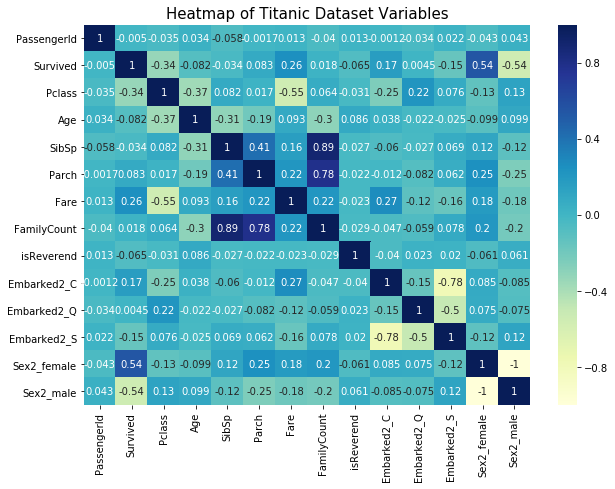

In [50]:
plt.figure(figsize=(10, 7))
sns.heatmap(titanic.corr(), annot=True,cmap="YlGnBu")
plt.title('Heatmap of Titanic Dataset Variables', fontsize=15)
plt.savefig('Heatmap.png')

Next I looked at some histograms of the couple continuous variables we have in the dataset, Age and Fare. Fare is pretty skewed, and we identified a couple outlier high-priced tickets above. The average fare is $32. 

Text(0,0.5,'Number of Passengers')

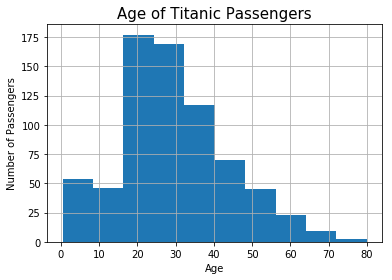

In [51]:
titanic['Age'].hist()
plt.title('Age of Titanic Passengers', fontsize=15)
plt.xlabel('Age')
plt.ylabel("Number of Passengers")

Text(0,0.5,'Number of Passengers')

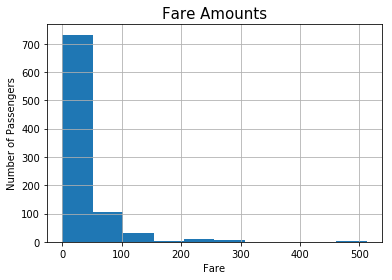

In [52]:
titanic['Fare'].hist()
plt.title('Fare Amounts', fontsize=15)
plt.xlabel('Fare')
plt.ylabel("Number of Passengers")

### Scatterplots and Boxplot
Mostly just for practice, I looked at some scatterplots of the couple of continuous variables we had, Age, Fare. I tried Class too, although that is categorical. 

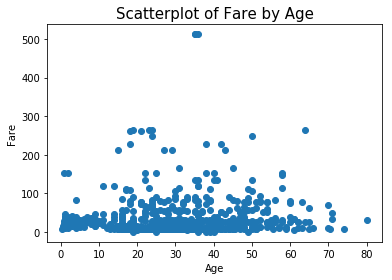

In [53]:
plt.scatter(titanic['Age'], titanic['Fare'])
plt.title('Scatterplot of Fare by Age', fontsize=15)
plt.xlabel('Age')
plt.ylabel("Fare")
plt.savefig('FareByAge.png')

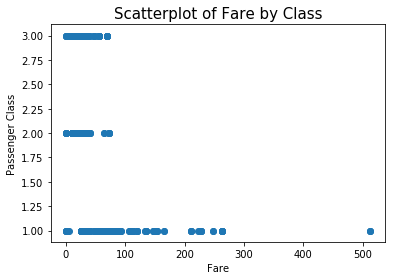

In [54]:
plt.scatter(titanic['Fare'], titanic['Pclass'])
plt.title('Scatterplot of Fare by Class', fontsize=15)
plt.xlabel('Fare')
plt.ylabel("Passenger Class")
plt.savefig('FareByClass.png')

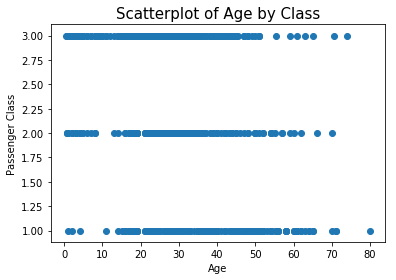

In [55]:
plt.scatter(titanic['Age'], titanic['Pclass'])
plt.title('Scatterplot of Age by Class', fontsize=15)
plt.xlabel('Age')
plt.ylabel("Passenger Class")
plt.savefig('FareByClass.png')

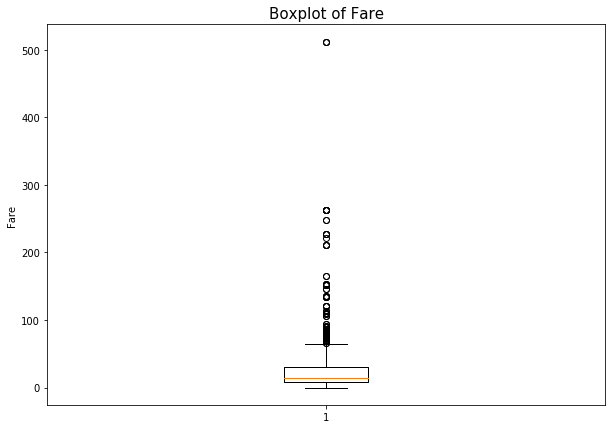

In [56]:
plt.figure(figsize=(10, 7))
plt.boxplot(titanic["Fare"])
plt.title('Boxplot of Fare', fontsize=15)
#plt.xlabel('Age')
plt.ylabel("Fare")
plt.savefig('FareBoxPlot.png')

In [57]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 22 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            712 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          889 non-null object
Embarked       889 non-null object
FamilyCount    889 non-null int64
isReverend     889 non-null int64
Embarked2_C    889 non-null uint8
Embarked2_Q    889 non-null uint8
Embarked2_S    889 non-null uint8
Sex2_female    889 non-null uint8
Sex2_male      889 non-null uint8
CabinType      889 non-null category
age_bins       712 non-null category
Family         889 non-null object
dtypes: category(2), float64(2), int64(7), object(6), uint8(5)
memory usage: 157.8+ KB


### Bar Plots
Finally, I ran all manner of barplots and countplots for the categorical variables, Gender, Age Groups, Class, Cabin,Embarkation, Presence of Family.

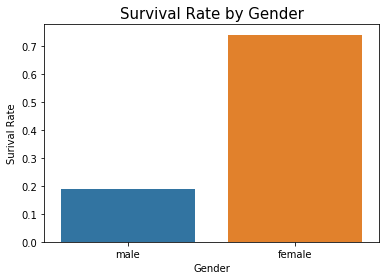

In [58]:
sns.barplot(x="Sex", y="Survived", data=titanic, ci=None)
plt.title('Survival Rate by Gender', fontsize=15)
plt.xlabel('Gender')
plt.ylabel("Surival Rate")
plt.savefig('SurvByGender.png')


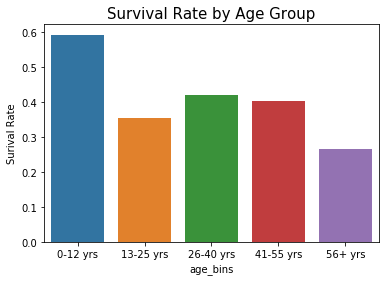

In [59]:
sns.barplot(x="age_bins", y="Survived", data=titanic, ci=None)
plt.title('Survival Rate by Age Group', fontsize=15)
plt.xlabel('age_bins')
plt.ylabel("Surival Rate")
plt.savefig('SurvByAgeGroup.png')

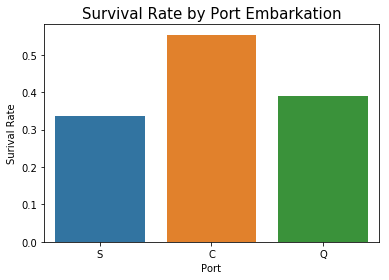

In [60]:
sns.barplot(x="Embarked", y="Survived", data=titanic, ci=None)
plt.title('Survival Rate by Port Embarkation', fontsize=15)
plt.xlabel('Port')
plt.ylabel("Surival Rate")
plt.savefig('SurvByPort.png')
#plt.text(1,.4, 'Cherbourg')
#plt.text(0,.2, 'Southampton')

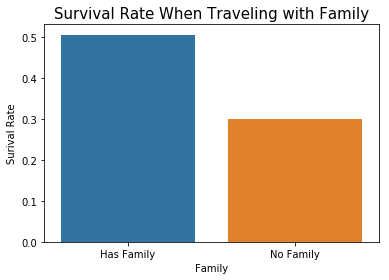

In [61]:
sns.barplot(x="Family", y="Survived", data=titanic, ci=None)
plt.title('Survival Rate When Traveling with Family', fontsize=15)
plt.xlabel('Family')
plt.ylabel("Surival Rate")
plt.savefig('SurvByFamily.png')

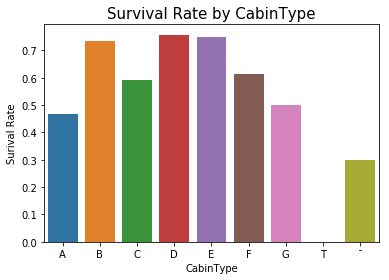

In [62]:
sns.barplot(x="CabinType", y="Survived", data=titanic, ci=None)
plt.title('Survival Rate by CabinType', fontsize=15)
plt.xlabel('CabinType')
plt.ylabel("Surival Rate")
plt.savefig('SurvByCabinType.png')

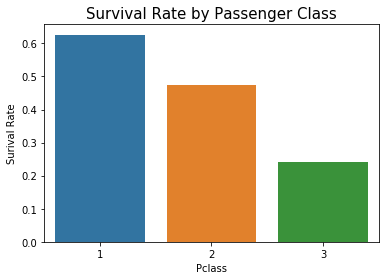

In [63]:
sns.barplot(x="Pclass", y="Survived", data=titanic, ci=None)
plt.title('Survival Rate by Passenger Class', fontsize=15)
plt.xlabel('Pclass')
plt.ylabel("Surival Rate")
plt.savefig('SurvByClass.png')

### Bar Plots Using Two Variables

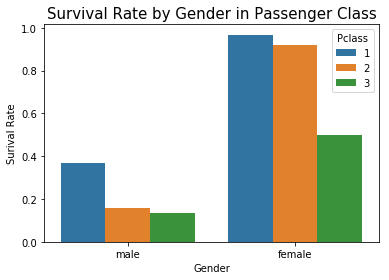

In [64]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=titanic, ci=None)
plt.title('Survival Rate by Gender in Passenger Class', fontsize=15)
plt.xlabel('Gender')
plt.ylabel("Surival Rate")
plt.savefig('SurvByGenderAndClass.png')

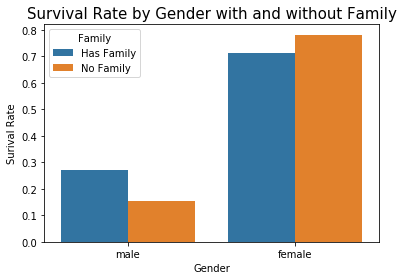

In [65]:
sns.barplot(x="Sex", y="Survived", hue="Family", data=titanic, ci=None)
plt.title('Survival Rate by Gender with and without Family', fontsize=15)
plt.xlabel('Gender')
plt.ylabel("Surival Rate")
plt.savefig('SurvByGenderAndFamily.png')

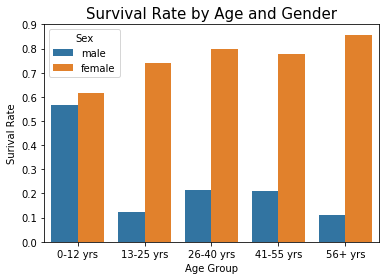

In [66]:
sns.barplot(x="age_bins", y="Survived", hue="Sex", data=titanic, ci=None)
plt.title('Survival Rate by Age and Gender', fontsize=15)
plt.xlabel('Age Group')
plt.ylabel("Surival Rate")
plt.savefig('SurvByGenderAndAge.png')

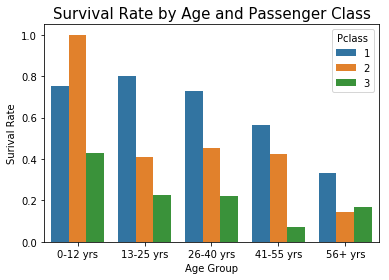

In [67]:
sns.barplot(x="age_bins", y="Survived", hue="Pclass", data=titanic, ci=None)
plt.title('Survival Rate by Age and Passenger Class', fontsize=15)
plt.xlabel('Age Group')
plt.ylabel("Surival Rate")
plt.savefig('SurvByAgeAndClass.png')

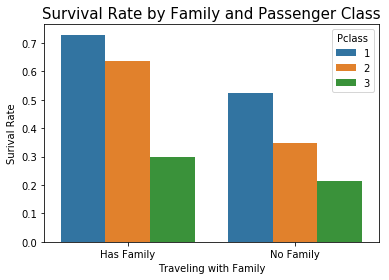

In [68]:
sns.barplot(x="Family", y="Survived", hue="Pclass", data=titanic, ci=None)
plt.title('Survival Rate by Family and Passenger Class', fontsize=15)
plt.xlabel('Traveling with Family')
plt.ylabel("Surival Rate")
plt.savefig('SurvByAgeAndFamily.png')

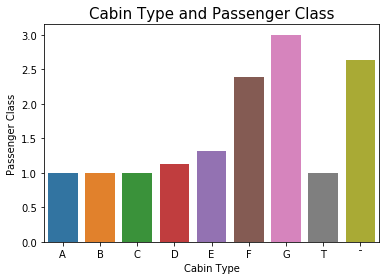

In [69]:
sns.barplot(x="CabinType", y="Pclass", data=titanic, ci=None)
plt.title('Cabin Type and Passenger Class', fontsize=15)
plt.xlabel('Cabin Type')
plt.ylabel("Passenger Class")
plt.savefig('SurvByCabinAndClass.png')

### Count Plots
I ended up using the Bar Plots in my presentation since they had Survival as a percentage, but I include these here just so you can see what I did.

Text(0,0.5,'Number of Passengers')

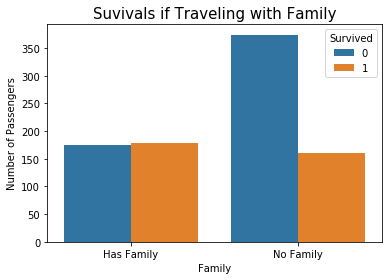

In [70]:
sns.countplot(x="Family", hue="Survived", data=titanic)
plt.title('Suvivals if Traveling with Family', fontsize=15)
plt.xlabel('Family')
plt.ylabel("Number of Passengers")

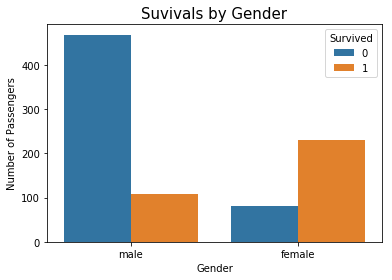

In [71]:
sns.countplot(x="Sex", hue="Survived", data=titanic, )
plt.title('Suvivals by Gender', fontsize=15)
plt.xlabel('Gender')
plt.ylabel("Number of Passengers")
plt.savefig('SurvByGender_count.png')

Text(0,0.5,'Number of Passengers')

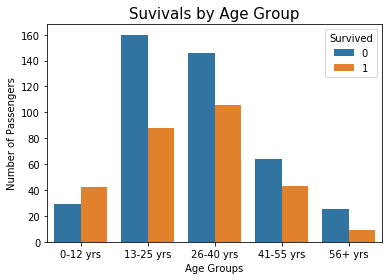

In [72]:
sns.countplot(x="age_bins", hue="Survived", data=titanic)
plt.title('Suvivals by Age Group', fontsize=15)
plt.xlabel('Age Groups')
plt.ylabel("Number of Passengers")

Text(0,0.5,'Number of Passengers')

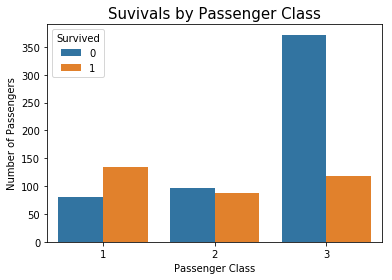

In [73]:
#https://seaborn.pydata.org/tutorial/categorical.html
sns.countplot(x="Pclass", hue="Survived", data=titanic)
plt.title('Suvivals by Passenger Class', fontsize=15)
plt.xlabel('Passenger Class')
plt.ylabel("Number of Passengers")

In [74]:
titanic.groupby(['Pclass'])['Survived'].mean() * 100

Pclass
1    62.616822
2    47.282609
3    24.236253
Name: Survived, dtype: float64

## Code I Tried and Could Not Get to Work. :( 

/Users/Morgan2/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


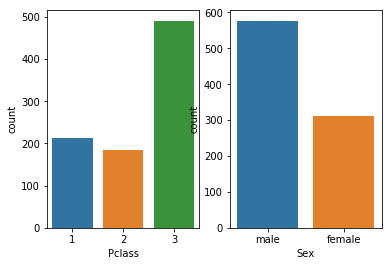

In [75]:
#Trying to figure out how to get multiple plots in one figure. I could only get two. 
fig, ax =plt.subplots(1,2)
sns.countplot(titanic['Pclass'], ax=ax[0])
sns.countplot(titanic['Sex'], ax=ax[1])
fig.show()

In [76]:
# # axes are in a two-dimensional array, indexed by [row, col]
# for i in range(2):
#     for j in range(3):
#         ax[i, j].text(0.5, 0.5, str((i, j)),
#                       fontsize=18, ha='center')
    


I tried a few times to create new variables by creating a function and using .apply. I don't know why these won't work. I ended up finding other work-arounds, but I'd really like to figure out why these don't work. 

In [77]:
# Trying to create a dichotomous Family variable from the continuous FamilyCount variable. 


# titanic['Has_Family'] = 0
# titanic.head()

# for num in titanic['FamilyCount']:
#     if num == 0: 
#         titanic['Has_Family'] == 0
#     else:
#         titanic['Has_Family'] == 1
# titanic['Has_Family'].value_counts()

In [78]:
#This is code I was trying to create age groups from the continuous variable Age.


#titanic['AgeUnder12'] = np.where(titanic['Age']<=12.0, 'yes', 'no')
#titanic.head()

#def age_ranges(age):
#    if (age <= 12.0): return titanic['Age_Ranges'] == '0-12 yrs'
#    elif ((12.0 > age) & (age <= 18.0)): return titanic['Age_Ranges'] == '13-18 yrs'
#    elif ((age > 18.0) & (age <= 30.0)): return titanic['Age_Ranges'] == '19-30 yrs'
#    elif ((age > 30.0) & (age <= 45.0)): return titanic['Age_Ranges'] == '31-45 yrs'
#    elif ((age > 45.0) & (age <= 60.0)): return titanic['Age_Ranges'] == '46-60 yrs'
#    elif (age >= 61.0): return titanic['Age_Ranges'] == '61+ yrs'
#    else: return titanic['Age_Ranges'] == 'None'

#titanic[['Age_Ranges']] = titanic[['Age']].apply(age_ranges)

In [79]:
#I tried to use .apply with a function I created to identify whether "Rev." was present in Name. 
#If yes, return 1 to the "isReverand" column, else 0. 
#Then, I would use .apply to the Name column and pass the function. Didn't work. 

#creating a new column for isReverend
#titanic['isReverend'] = 0
#titanic.head()

#def is_Reverend(name):
#    if "Rev." in name: 
#        return titanic['isReverend'] == 1
#    else:
#        return titanic['isReverend'] == 0

#titanic[['isReverend']] = titanic[['Name']].apply(is_Reverend)
#titanic['isReverend']

In [80]:
#This is the for loop Ed helped me with instead. 
#For loop gives a pink warning and takes a long time to run, but works. 

#titanic = titanic.reset_index()
#for i in range(len(titanic['Name'])):
#    if "Rev." in titanic['Name'][i]:
#        titanic['isReverend'][i] = 1
#    else:
#        titanic['isReverend'][i] = 0
        

In [81]:
#Creating a function to isolate the first letter of Cabin - for groupby analysis

#titanic['CabinType'] = titanic['Cabin']
#titanic.head()

#def cabin_type(cabin):
#    return cabin[0]

#titanic[['CabinType']] = titanic[['Cabin']].apply(cabin_type)
#titanic.head()

In [82]:
#sex_survived = pd.crosstab(index=titanic["Survived"], columns=[titanic["Pclass"],titanic["Sex"]],margins=True)
#sex_survived/sex_survived.loc["All"]

In [83]:
#df = df.pivot(index='ID', columns='status', values='quantity')
#titanic['Age2'] = titanic['Age'].astype(float)
#titanic.head()

In [84]:
#titanic['Age'] = titanic['Age'].astype(float)
#titanic.head()

In [85]:
#titanic.CabinType = titanic.CabinType.fillna('¯\(ツ)/¯')
#titanic['CabinTypes'].value_counts()